# **TASK 2**

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

 **1: Select a stock (e.g., Apple, Tesla).**

In [ ]:
stock_symbol = 'TSLA'

**2: Load historical data using the yfinance library.**

In [ ]:
df = yf.download(stock_symbol, start="2022-01-01", end="2025-01-01")
print(df.head())

/tmp/ipython-input-6-3743023097.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start="2022-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2022-01-03  399.926666  400.356659  378.679993  382.583344  103931400
2022-01-04  383.196655  402.666656  374.350006  396.516663  100248300
2022-01-05  362.706665  390.113342  360.336670  382.216675   80119800
2022-01-06  354.899994  362.666656  340.166656  359.000000   90336600
2022-01-07  342.320007  360.309998  336.666656  360.123322   84164700


**3: Use features like Open, High, Low, and Volume to predict the next Close price.**

In [ ]:
df = df[['Open', 'High', 'Low', 'Volume', 'Close']].dropna()

# Shift Close price to predict next day's Close
df['Next_Close'] = df['Close'].shift(-1)
df.dropna(inplace=True)

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

**4: Train a Linear Regression or Random Forest model.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(n_estimators=100, random_state=42)

# model = LinearRegression()

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**5: Plot actual vs predicted closing prices for comparison.**

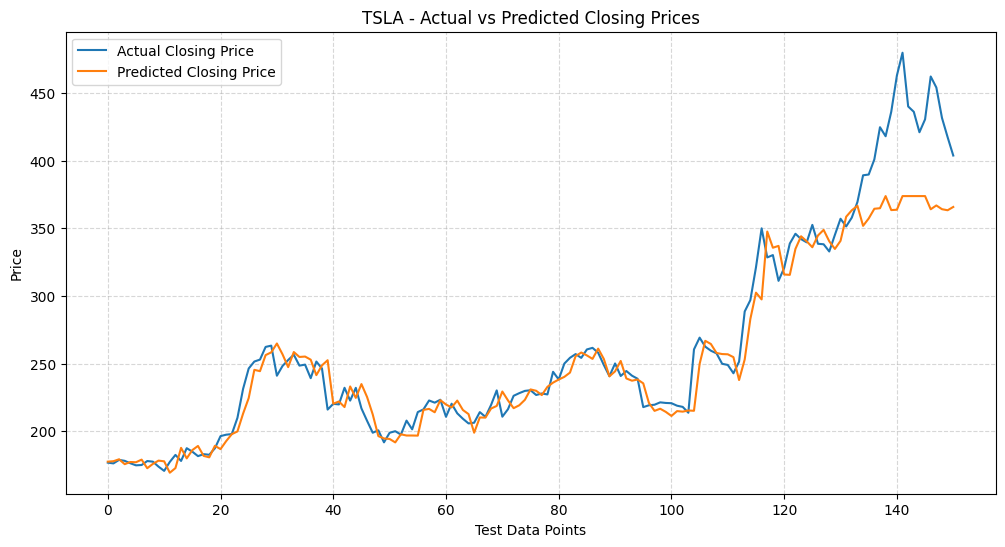

In [ ]:

y_pred = model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Closing Price')
plt.plot(y_pred, label='Predicted Closing Price')
plt.title(f"{stock_symbol} - Actual vs Predicted Closing Prices")
plt.xlabel('Test Data Points')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()